In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
%matplotlib inline

# 1 Global Earthquakes

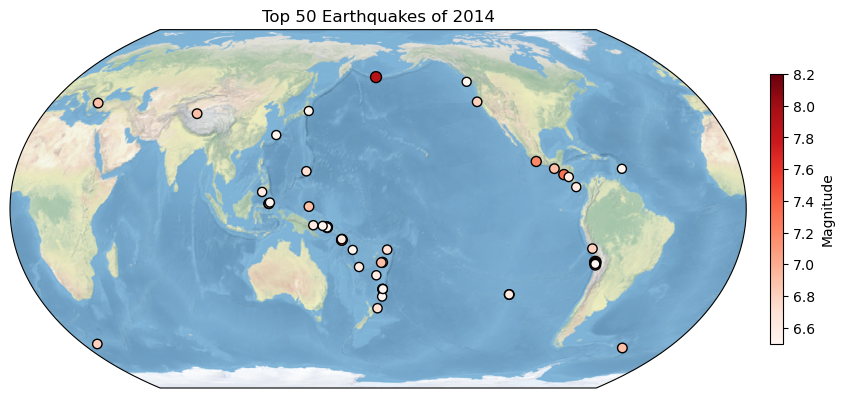

In [2]:
# 读取地震数据
eqs = pd.read_csv('usgs_earthquakes.csv')

# 筛选出震级top50的地震数据
eqs = eqs.sort_values(["mag"],ascending=False).head(50)

# 创建地图
fig = plt.figure(figsize=(10, 5),dpi=100)
ax = fig.add_subplot(1, 1, 1, projection=ccrs.EqualEarth(central_longitude=180))
ax.set_global()
ax.stock_img()


# 筛选出2014年震级top50的地震点（位置及震级）
# 将筛选出的50个点添加到地图中
eq = ax.scatter(eqs['longitude'], eqs['latitude'], s=eqs['mag']**2, c=eqs['mag'], alpha=1, cmap='Reds', edgecolor='k', transform=ccrs.PlateCarree())

# 修饰图幅：
# 添加colorbar
plt.colorbar(eq, label='Magnitude',fraction = 0.02, shrink = 0.7, pad=0.03)
# 添加图幅标题title
plt.title("Top 50 Earthquakes of 2014")

plt.show()

分析题目要求复现的图，该图为2014年震级最大的50次地震（包括发生位置及震级大小）的展示。

为再现该图，我首先进行了最大50次地震数据的筛选，再使用了课上学习的cartopy地图绘图包进行地图绘制，将筛选出的点添加到全球地图中，并对添加的点进行了边线粗细等修饰，最后添加颜色条和图幅标题，完成地图复现。

# 2 Explore a netCDF dataset

在本题中，我使用了月尺度全球降水数据（from NOAA Physical Sciences Laboratory GPCC(Global Precipitation Climatology Centre) from 1891-present, the dataset is calculated from global station data. https://psl.noaa.gov/data/gridded/data.gpcc.html#detail ） 
，分辨率2.5 * 2.5，同Assignment 03.

## 2.1 Make a global map of mean monthly precipitation 

In [192]:
# 读取数据并查看信息
pp = xr.open_dataset("precip.mon.total.2.5x2.5.v7.nc",engine="netcdf4")
pp

<xarray.Dataset>
Dimensions:  (lat: 72, lon: 144, time: 1356)
Coordinates:
  * lat      (lat) float32 88.75 86.25 83.75 81.25 ... -83.75 -86.25 -88.75
  * lon      (lon) float32 1.25 3.75 6.25 8.75 11.25 ... 351.2 353.8 356.2 358.8
  * time     (time) datetime64[ns] 1901-01-01 1901-02-01 ... 2013-12-01
Data variables:
    precip   (time, lat, lon) float32 ...
Attributes:
    history:          Created 01/2016 based on V7 data obtained via ftp
    title:            GPCC Precipitation Full V7 2.5x2.5 Monthly Total
    Conventions:      CF 1.0
    References:       http://www.psl.noaa.gov/data/gridded/data.gpcc.html
    Original_Source:  http://www.dwd.de/en/FundE/Klima/KLIS/int/GPCC/GPCC.htm...
    Reference:        Users of the data sets are kindly requested to give fee...
    original_source:  ftp://ftp-anon.dwd.de/pub/data/gpcc/html/fulldata_downl...
    dataset_title:    Global Precipitation Climatology Centre (GPCC)

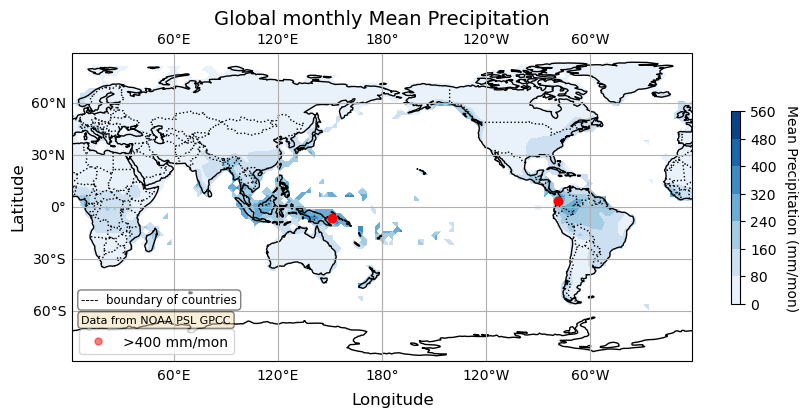

In [215]:
import matplotlib.lines as mlines

precip = pp.variables['precip'][:]
lat = pp.variables['lat'][:]
lon = pp.variables['lon'][:]

# 将经纬度数据网格化
lon_grid, lat_grid = np.meshgrid(lon, lat)

# 计算月平均降水
mean_precip = np.mean(precip, axis=0)

# 找到降水量超过400mm的数据点
high_precip = mean_precip > 400

# 创建一个地图图幅
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=180))
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# 添加网格线
ax.gridlines(draw_labels=True)

# 绘制月均降水数据
c = ax.contourf(lon_grid, lat_grid, mean_precip, transform=ccrs.PlateCarree(), cmap='Blues')

# 添加标题和坐标轴标签
plt.title('Global monthly Mean Precipitation',size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 添加图例
heavy_rain_legend = mlines.Line2D([], [], color='red',alpha=0.5, marker='o', linestyle='None', markersize=5, label='>400 mm/mon')
plt.legend(handles=[heavy_rain_legend], loc='lower left')

# 在地图上标注降水量超过400mm的数据点
ax.plot(lon_grid[high_precip], lat_grid[high_precip], 'ro', transform=ccrs.PlateCarree())

# 添加颜色条
cbar = plt.colorbar(c, label='Precipitation', shrink=0.5, pad=0.05)
cbar.set_label('Mean Precipitation (mm/mon)', rotation=270, labelpad=15)

# 添加注释(文本框)
textstr = 'Data from NOAA PSL GPCC'
textstr_lon = 'Longitude'
textstr_lat = 'Latitude'
textstrline = '----  boundary of countries'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
prop1 = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.015, 0.15, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax.text(0.45, -0.1, textstr_lon, transform=ax.transAxes, fontsize=12,
        verticalalignment='top')
ax.text(-0.1, 0.65, textstr_lat, transform=ax.transAxes, fontsize=12,
        verticalalignment='top',rotation=90)
ax.text(0.015, 0.22, textstrline, transform=ax.transAxes, fontsize=8.5,
        verticalalignment='top',bbox=prop1)

# 显示图像
plt.show()

在本题中，首先读取全球月尺度降水数据并将经纬度数据网格化，计算月平均降水并找到月降水量超过400mm的数据点，创建一个地图图幅之后使用cartopy绘制月均降水数据，将超过月降水400mm的数据在图上用红色圆点标注，再进行地图修饰（包括添加颜色条、经纬度网格坐标及标签、标题、图例、标签、注释和文本框等）。

全球月降水量超过400mm的地点有两处，均在赤道附近，分别为非洲西北部和澳洲北部。

## 2.2 Make a map of mean monthly precipitation of Shenzhen

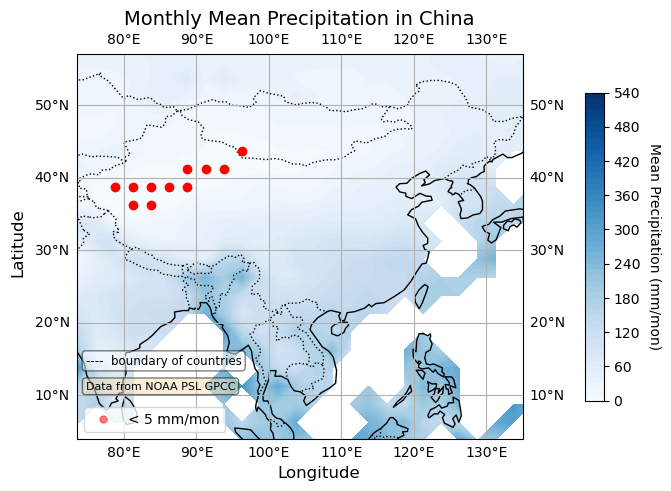

In [214]:
import matplotlib.lines as mlines

dataset = xr.open_dataset("precip.mon.total.2.5x2.5.v7.nc",engine="netcdf4")
pp1 = dataset.variables['precip'][:]
lat = dataset.variables['lat'][:]
lon = dataset.variables['lon'][:]

# 将经纬度数据网格化
lon_grid, lat_grid = np.meshgrid(lon, lat)

# 计算月平均降水
mean_precip = np.mean(pp1, axis=0)

# 找到并标记月降水量低于5mm的网格
low_rain = mean_precip < 5.0

# 创建地图图幅
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=104.3))
ax.set_extent([73.5, 135, 3.97, 53.5])  # 设置中国的经纬度范围
ax.add_feature(cfeature.COASTLINE)     # 添加海岸线
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)         # 添加网格线

# 绘制中国月平均降水量数据
plt.contourf(lon, lat, mean_precip, 60, transform=ccrs.PlateCarree(), cmap='Blues')

# 添加标题和坐标轴标签
plt.title('Monthly Mean Precipitation in China',size=14)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 添加图例
low_rain_legend = mlines.Line2D([], [], color='red',alpha=0.5, marker='o', linestyle='None', markersize=5, label='< 5 mm/mon')
plt.legend(handles=[low_rain_legend], loc='lower left')

# 在地图上标注月均降水量低于5mm的数据点
ax.plot(lon_grid[low_rain], lat_grid[low_rain], 'ro', transform=ccrs.PlateCarree())

# 添加颜色条
bar = plt.colorbar(ax=ax, orientation='vertical', pad=0.1, aspect=16, shrink=0.8)
bar.set_label('Mean Precipitation (mm/mon)', rotation=270, labelpad=15)

# 添加注释(文本框)
textstr = 'Data from NOAA PSL GPCC'
textstr_lon = 'Longitude'
textstr_lat = 'Latitude'
textstrline = '----  boundary of countries'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
prop1 = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.text(0.02, 0.15, textstr, transform=ax.transAxes, fontsize=8,
        verticalalignment='top', bbox=props)
ax.text(0.45, -0.07, textstr_lon, transform=ax.transAxes, fontsize=12,
        verticalalignment='top')
ax.text(-0.15, 0.6, textstr_lat, transform=ax.transAxes, fontsize=12,
        verticalalignment='top',rotation=90)
ax.text(0.02, 0.22, textstrline, transform=ax.transAxes, fontsize=8.5,
        verticalalignment='top',bbox=prop1)

# 显示图像
plt.show()

在本题中，首先读取全球月尺度降水数据并将经纬度数据网格化，再将区域范围设置为中国，绘制计算月平均降水，创建一个地图图幅之后使用cartopy绘制月均降水数据，筛选月降水量低于5mm的数据点，将月降水不足50mm的数据在图上用红色圆点标注，再进行地图修饰（包括添加颜色条、经纬度网格坐标及标签、标题、图例、标签、注释和文本框等）。

全球月降水量不足5mm的数据有10个，均分布在我国西北内陆地区，该结果与我国西北地区气候特征一致。